## Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook # for the progress bar

# Plotting Sigmoid Function

$$S_{w,b} = \frac {1} {1+e^{-(w_x+b)}}$$

In [2]:
def sigmoid(w,b,x):
  return 1/(1+np.exp(-(w*x+b)))

sigmoid(1,0.5,0)

0.6224593312018546

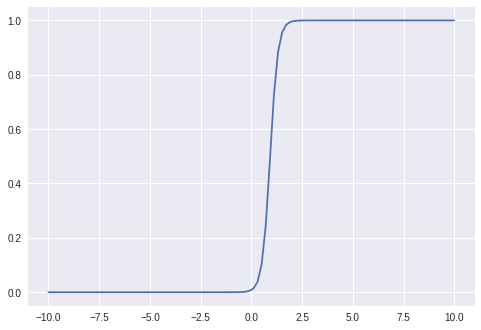

In [3]:
X = np.linspace(-10,10,100) 
w = 5.2 #@param {type: "slider", min: -10, max: 10, step: 0.1}
b = -4.8 #@param {type: "slider", min: -10, max: 10, step: 0.1}
Y = sigmoid(w,b,X)
plt.plot(X,Y)
plt.show()

# Plotting Sigmoid 3D

$$S_{w1,w2,b}(x1,x2) = \frac {1} {1+e^{-(w_{x1}+w_{x2}+b)}}$$

In [4]:
def sigmoid_2d(x1,x2,w1,w2,b):
  return 1/(1+np.exp(-(w1*x1+w2*x2+b)))

sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [29]:
from mpl_toolkits import mplot3d
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-15,15,100)
X1,X2 = np.meshgrid(X1,X2)

w1 = 0.5
w2 = 0.5
b = 0
Y = sigmoid_2d(X1,X2,w1,w2,b)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.plot_surface(X1,X2,Y,cmap='viridis')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'X1')

Text(0.5, 0, 'X2')

Text(0.5, 0, 'Y')

In [30]:
# cmap - color coding
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",['red','yellow','green'])

# contour plot
plt.contourf(X1,X2,Y,cmap=my_cmap)
plt.xlabel('Weight')
plt.ylabel('Bias value')
plt.show()

Text(0.5, 0, 'Weight')

Text(0.5, 0, 'Bias value')

# Plotting the Loss

In [7]:
# suppose this are the correct parameters for the given X values 
w_unknown = 0.5
b_unknown = 0.2
X = np.random.random(50)*20-10
Y = sigmoid(w_unknown,b_unknown,X)

# plotting the model
plt.plot(X,Y,'*')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Loss function**
$$Loss = \sum_i^n (y_i - f(x_i))^2$$

In [0]:
def loss_function(w,b,X,Y):
  loss = 0
  for x,y in zip(X,Y):
    loss += (y-sigmoid(w,b,x))**2
  return loss

In [0]:
# now plottig the loss for grid of X and B parameter between a range of 100
W1 = np.linspace(0,1,100)
B1 = np.linspace(0,1,100)
WW,BB = np.meshgrid(W1,B1)

loss = np.zeros(WW.shape)

for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    loss[i,j]= loss_function(WW[i,j],BB[i,j],X,Y)

In [10]:
# plotting the loss function

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,loss,cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'Loss')

<IPython.core.display.Javascript object>

In [11]:
# checking the coordinates for the parameters with lowest loss
ij = np.argmin(loss)
i = int(np.floor(ij/WW.shape[1]))
j = ij - i*WW.shape[1]
loss[i,j],WW[i,j],BB[i,j]

(9.627806321221644e-05, 0.5050505050505051, 0.20202020202020204)

# Class for sigmoid neuron

In [0]:
class SigmoidNeuron:
  
  # initialize the parameters
  def __inti__(self):
    self.w = None
    self.b = None
    self.wts = None
   
  # model function
  def sigmoid_perceptron(self,x):
    v = np.dot(x,self.w)+self.b
    return 1/(1+np.exp(-v))
  
  # gradient function and learning algorithm
  
  # 1. grad for the weights
  def grad_w(self,x,y):
    f_x = self.sigmoid_perceptron(x)
    return (f_x-y)*f_x*(1-f_x)*x

  # 2. grad for the bias term
  def grad_b(self,x,y):
    f_x = self.sigmoid_perceptron(x)
    return (f_x-y)*f_x*(1-f_x)
  
  # learning algorithm
  def fit(self,X,Y,rate=1,epochs=1,plot_loss=False):    
    self.w = np.random.randn(X.shape[1],1)
    self.b = 0
    
    wts = []
    bs = []
    
    if plot_loss:
      loss = {}
    
    
    for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):      
      dw,db = 0,0
   
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      
      
      self.w -= rate*dw.reshape(X.shape[1],1)
      self.b -= rate*db
      
      wts.append(np.copy(self.w))
      bs.append(np.copy(self.b))
      
      if plot_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred,Y)
    
    if plot_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
    return wts,bs
  
  def predict(self,X):
    y_pred = []
    for x in X:
      y_pred.append(self.sigmoid_perceptron(x))
    return y_pred

# Fit for Toy data

In [0]:
# toy data
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

In [14]:
np.shape(X),np.shape(Y)

((6, 2), (6,))

In [15]:
sn = SigmoidNeuron()
wts,bs = sn.fit(X,Y,rate=0.25,epochs=40)

In [0]:
def sigmoid_perceptron(w,b,x):
    v = np.dot(x,w)+b
    return 1/(1+np.exp(-v))


# contourplot to see the model
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)
X1,X2 = np.meshgrid(X1,X2)

def return_contour(X1,X2,wts,bs):
  
  predictions = []
  
  
  for w,b in zip(wts,bs):
    
    Y_pred = np.zeros(X1.shape)

    for i in range(X1.shape[0]):
      for j in range(X1.shape[1]):
        data = [X1[i,j],X2[i,j]]
        Y_pred[i,j] = sigmoid_perceptron(w,b,data)

    predictions.append(Y_pred)
    
  return predictions

#plt.contourf(X1,X2,return_contour(X1,X2),cmap=my_cmap,alpha=0.5)
#plt.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
#plt.xlabel('Feature X1')
#plt.ylabel('Feature X2')
#plt.show()

In [0]:
learning = return_contour(X1,X2,wts,bs)

## Animation

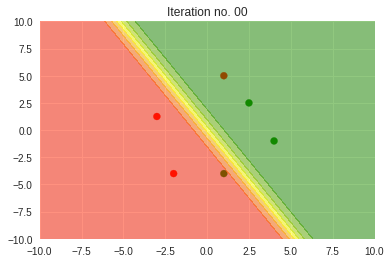

In [18]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

fig,ax = plt.subplots()


def animate(i):
  ax.clear()
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
  ax.contourf(X1,X2,learning[i],cmap=my_cmap,alpha=0.5)
  ax.set_title('Iteration no. %02d'%(i))
  ax.set_xlim((-10,10))
  ax.set_ylim((-10,10))

interval = 3 #in seconds     
anim = animation.FuncAnimation(fig,animate,40,interval=interval*1e+2,blit=False)

HTML(anim.to_html5_video())

# Load the data from drive

In [19]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.3MB/s 


In [20]:
listed = drive.ListFile({'q': "title contains '.csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title mobile_cleaned-v2.csv, id 1VRAX5-i43TZDSDhGhyEtQjye52RMmhuH
title mobile_cleaned.csv, id 1-Rqq385lEA4AeLddC3ghY1Zkr5LF64at


In [0]:
# Import the file here
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1-Rqq385lEA4AeLddC3ghY1Zkr5LF64at'  # https://drive.google.com/open?id=1-Rqq385lEA4AeLddC3ghY1Zkr5LF64at
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('mobile_cleaned.csv')

# Loading the data

In [22]:
# Upload the file whenever running this code in a new session
data = pd.read_csv('mobile_cleaned-1.csv')
data.head()

FileNotFoundError: ignored

In [0]:
data.shape

In [0]:
# Binarizing the rating column, Selecting a threshold based on the skewness of the data
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)
data['Class'].value_counts(normalize=True)

# Binarizing the data set at particular threshold such that the data is not skewed.

In [0]:
# Splitting the data into X and Y variables
X = data.iloc[:,0:len(data.T)-2]
Y = data['Rating'].values
X.head()

In [0]:
Y_binarized = data['Class'].values
Y_binarized

# Standarization

In [0]:
# Demonstration of the standardization 
R = np.random.rand(100,1)
plt.plot(R)
plt.show()

In [0]:
np.mean(R)

In [0]:
scaler = StandardScaler()
R_T = scaler.fit_transform(R)
plt.plot(R_T)
plt.show()

In [0]:
# this plot is looks same as the orginal plot only thing is that the reference has changed.
np.mean(R_T) # mean is zero

**Question**: whether to standardize the data before split or after ? 

**Answer**: is to split it after the split. The test data shall be transformed as per scaler used for training data set.

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,stratify=Y_binarized)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [0]:
# Standardize the X_train and based on that transform the X_test set
sc = StandardScaler()
X_scaled_train = sc.fit_transform(X_train)
X_scaled_test = sc.transform(X_test)

In [0]:
# Scaling the Y column 
# For sigmoid neuron the output is between 0 and 1 so we will transform our Y column into 0 and 1 range
minmaxScaler = MinMaxScaler()
Y_scaled_train = minmaxScaler.fit_transform(Y_train.reshape(-1,1))
Y_scaled_test = minmaxScaler.transform(Y_test.reshape(-1,1))
Y_scaled_train

In [0]:
# transform the threshold as well using the minmaxscaler
Y_scaled_threshold = minmaxScaler.transform(np.array([threshold]).reshape(1,-1))
Y_binarized_train = (Y_scaled_train> Y_scaled_threshold).astype(np.int).ravel()
Y_binarized_test = (Y_scaled_test> Y_scaled_threshold).astype(np.int).ravel()
Y_binarized_test

# Train on the real data

In [0]:
np.shape(X_train),np.shape(Y_scaled_train)

In [0]:
# Learning/Fitting the model based on training dataset
sn = SigmoidNeuron()
wts,bs = sn.fit(X_scaled_train,Y_scaled_train,rate=0.015,epochs=2000,plot_loss=True)

Now we can increas the learning hereafter as we can see the mean squared error is getting saturated on further iterations/epochs. By increasing the learning rate we are giving more room to the algorithm to decrease the error further.

In [0]:
# Prediction of the training and test data
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

# Binarized the output of minmaxscaler as per the threshold 
Y_pred_binarized_train = (Y_pred_train> Y_scaled_threshold).astype(np.int).ravel()
Y_pred_binarized_test = (Y_pred_test> Y_scaled_threshold).astype(np.int).ravel()

# Accuracy score of the predictions
accuracy_train = accuracy_score(Y_pred_binarized_train,Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test,Y_binarized_test)

print(accuracy_train, accuracy_test)